### Introduccion a Tensorflow con funciones avanzadas

Importar librerías

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Leer y visualizar el conjunto de datos

In [45]:
X, y = make_moons(n_samples=2000, noise=0.5, random_state=3)

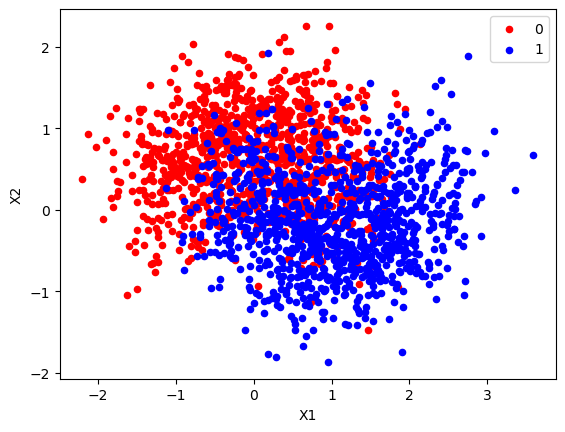

In [46]:
df = pd.DataFrame(dict(X1=X[:,0], X2=X[:,1], label=y))
colors = {0:'red', 1:'blue'}


fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])
plt.show()

Separación del conjunto de datos

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
print('Tamaño del conjunto de datos de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de datos de prueba: ', X_test.shape)

Tamaño del conjunto de datos de entrenamiento:  (80, 2)
Tamaño del conjunto de datos de prueba:  (20, 2)


In [6]:
pos_class = np.count_nonzero(y_train == 1) # Conteo de los valores "non-zero" en el arreglo
print('Número de elementos en la clase positiva ',pos_class)
neg_class = np.count_nonzero(y_train == 0)
print('Número de elementos en la clase negativa ',neg_class)

Número de elementos en la clase positiva  40
Número de elementos en la clase negativa  40


**1.   Definción del modelo con Overfitting**

In [7]:
# define model
model = Sequential()
model.add(Dense(150, input_dim=2, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**2.   Compilación del modelo**

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Visualización del modelo

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               450       
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 45901 (179.30 KB)
Trainable params: 45901 (179.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


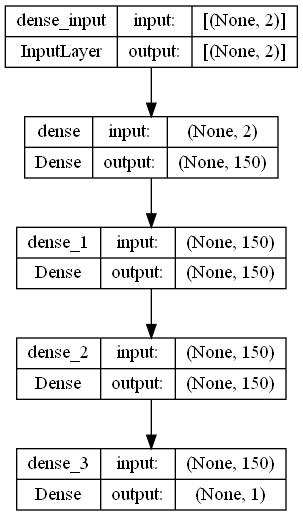

In [10]:
plot_model(model, show_shapes=True)

**3.   Ajuste del modelo**

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80,verbose=1)

Epoch 1/80
3/3 [==============================] - 2s 177ms/step - loss: 0.6888 - accuracy: 0.5625 - val_loss: 0.6610 - val_accuracy: 0.6000
Epoch 2/80
3/3 [==============================] - 0s 37ms/step - loss: 0.6380 - accuracy: 0.7500 - val_loss: 0.6362 - val_accuracy: 0.6000
Epoch 3/80
3/3 [==============================] - 0s 28ms/step - loss: 0.6014 - accuracy: 0.7875 - val_loss: 0.6136 - val_accuracy: 0.6000
Epoch 4/80
3/3 [==============================] - 0s 30ms/step - loss: 0.5600 - accuracy: 0.7875 - val_loss: 0.5954 - val_accuracy: 0.6000
Epoch 5/80
3/3 [==============================] - 0s 36ms/step - loss: 0.5277 - accuracy: 0.8000 - val_loss: 0.5844 - val_accuracy: 0.6000
Epoch 6/80
3/3 [==============================] - 0s 26ms/step - loss: 0.5007 - accuracy: 0.8000 - val_loss: 0.5815 - val_accuracy: 0.6000
Epoch 7/80
3/3 [==============================] - 0s 31ms/step - loss: 0.4848 - accuracy: 0.8000 - val_loss: 0.5833 - val_accuracy: 0.7000
Epoch 8/80
3/3 [==========

3/3 [==============================] - 0s 44ms/step - loss: 0.4103 - accuracy: 0.8125 - val_loss: 0.5595 - val_accuracy: 0.6000
Epoch 60/80
3/3 [==============================] - 0s 33ms/step - loss: 0.4065 - accuracy: 0.8000 - val_loss: 0.5587 - val_accuracy: 0.6000
Epoch 61/80
3/3 [==============================] - 0s 33ms/step - loss: 0.4057 - accuracy: 0.8000 - val_loss: 0.5579 - val_accuracy: 0.6000
Epoch 62/80
3/3 [==============================] - 0s 47ms/step - loss: 0.4052 - accuracy: 0.8000 - val_loss: 0.5574 - val_accuracy: 0.6000
Epoch 63/80
3/3 [==============================] - 0s 29ms/step - loss: 0.4055 - accuracy: 0.8000 - val_loss: 0.5582 - val_accuracy: 0.6000
Epoch 64/80
3/3 [==============================] - 0s 33ms/step - loss: 0.4032 - accuracy: 0.8000 - val_loss: 0.5568 - val_accuracy: 0.6000
Epoch 65/80
3/3 [==============================] - 0s 48ms/step - loss: 0.4020 - accuracy: 0.8000 - val_loss: 0.5549 - val_accuracy: 0.6000
Epoch 66/80
3/3 [===============

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Visualizar gráfica de error y accuracy

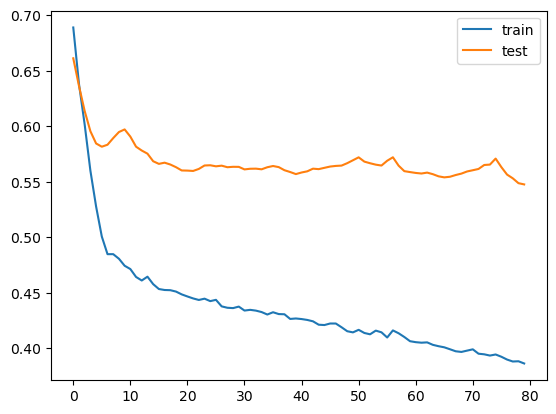

In [17]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

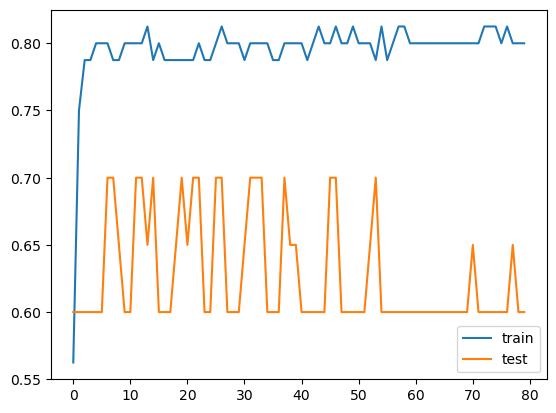

In [18]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**4.   Evaluación del modelo**

In [19]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')
print(f'Test Loss: {loss:.3f}')

Test Accuracy: 0.600
Test Loss: 0.548


Predicción en el conjunto de datos de prueba

In [20]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 1s 838ms/step


Matriz de confusión

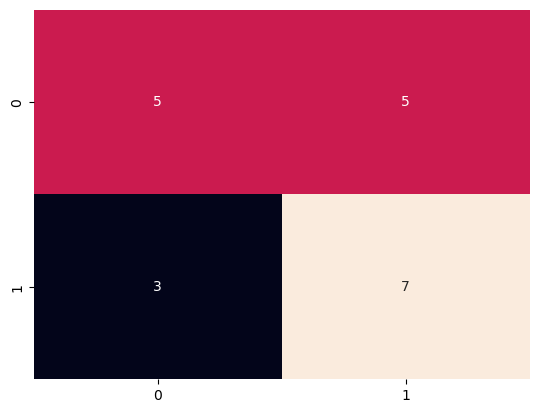

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cbar=False)
plt.show()

Visualizar la frontera de decisión

9600/9600 [==============================] - 11s 1ms/step


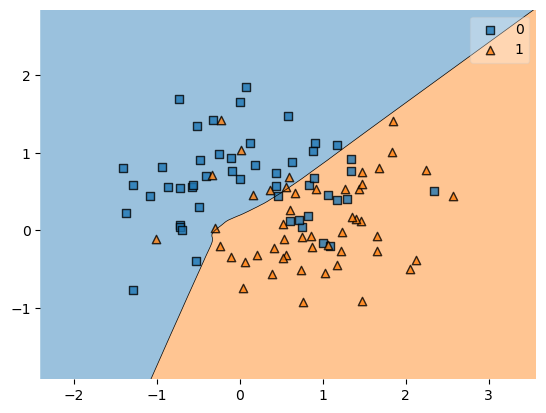

In [22]:
plot_decision_regions(X, y, clf=model, legend=1)
plt.show()

**5.   Realizar una predicción**

In [23]:
new_value = [0,0]
prediction = (model.predict([new_value]) > 0.5).astype("int32")
print('Clase predicha: ', prediction)

1/1 [==============================] - 0s 127ms/step
Clase predicha:  [[1]]


## Early Stopping

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
# define model
model = Sequential()
model.add(Dense(150, input_dim=2, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
es = EarlyStopping(monitor='val_loss', patience=10,  mode='min',  verbose=1)

In [51]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es] ,epochs=300,verbose=1)

Epoch 1/300
50/50 [==============================] - 2s 11ms/step - loss: 0.4877 - accuracy: 0.7788 - val_loss: 0.4126 - val_accuracy: 0.8100
Epoch 2/300
50/50 [==============================] - 0s 7ms/step - loss: 0.4233 - accuracy: 0.8050 - val_loss: 0.4085 - val_accuracy: 0.8075
Epoch 3/300
50/50 [==============================] - 0s 6ms/step - loss: 0.4247 - accuracy: 0.8050 - val_loss: 0.4087 - val_accuracy: 0.8150
Epoch 4/300
50/50 [==============================] - 0s 5ms/step - loss: 0.4156 - accuracy: 0.8144 - val_loss: 0.4066 - val_accuracy: 0.8175
Epoch 5/300
50/50 [==============================] - 0s 8ms/step - loss: 0.4092 - accuracy: 0.8125 - val_loss: 0.4062 - val_accuracy: 0.8125
Epoch 6/300
50/50 [==============================] - 0s 8ms/step - loss: 0.4054 - accuracy: 0.8163 - val_loss: 0.3986 - val_accuracy: 0.8200
Epoch 7/300
50/50 [==============================] - 0s 7ms/step - loss: 0.4041 - accuracy: 0.8169 - val_loss: 0.4000 - val_accuracy: 0.8050
Epoch 8/300


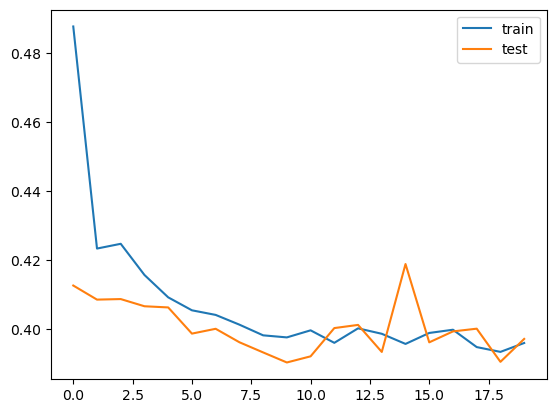

In [52]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

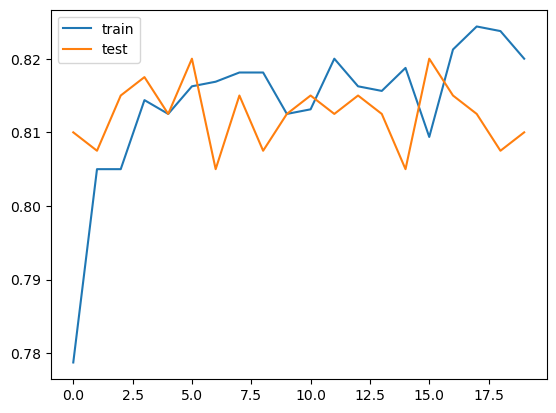

In [53]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [54]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Accuracy: {acc:.3f}')
print(f'Train Loss: {loss:.3f}')

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')
print(f'Test Loss: {loss:.3f}')

Train Accuracy: 0.824
Train Loss: 0.388
Test Accuracy: 0.810
Test Loss: 0.397


In [55]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

13/13 [==============================] - 0s 2ms/step


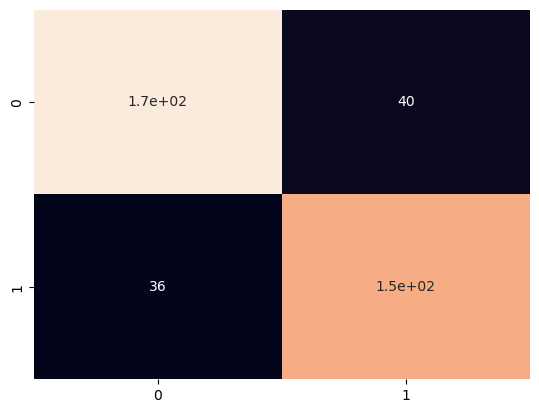

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cbar=False)
plt.show()

9600/9600 [==============================] - 16s 2ms/step


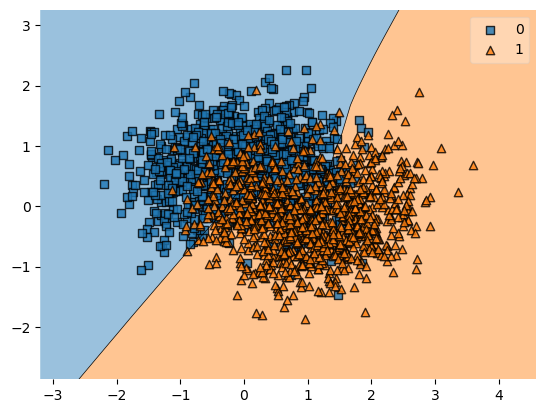

In [57]:
plot_decision_regions(X, y, clf=model, legend=1)
plt.show()

## Regularización con Dropout

In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
# define model
model = Sequential()
model.add(Dense(150, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300,verbose=1)

Epoch 1/300
3/3 [==============================] - 2s 227ms/step - loss: 0.6855 - accuracy: 0.6000 - val_loss: 0.6655 - val_accuracy: 0.6000
Epoch 2/300
3/3 [==============================] - 0s 116ms/step - loss: 0.6485 - accuracy: 0.7500 - val_loss: 0.6487 - val_accuracy: 0.6000
Epoch 3/300
3/3 [==============================] - 0s 65ms/step - loss: 0.6365 - accuracy: 0.7375 - val_loss: 0.6318 - val_accuracy: 0.6000
Epoch 4/300
3/3 [==============================] - 0s 49ms/step - loss: 0.6023 - accuracy: 0.7375 - val_loss: 0.6168 - val_accuracy: 0.6000
Epoch 5/300
3/3 [==============================] - 0s 41ms/step - loss: 0.5725 - accuracy: 0.8000 - val_loss: 0.6054 - val_accuracy: 0.6000
Epoch 6/300
3/3 [==============================] - 0s 38ms/step - loss: 0.5397 - accuracy: 0.8000 - val_loss: 0.5996 - val_accuracy: 0.6000
Epoch 7/300
3/3 [==============================] - 0s 33ms/step - loss: 0.5163 - accuracy: 0.7875 - val_loss: 0.5984 - val_accuracy: 0.6000
Epoch 8/300
3/3 [=

3/3 [==============================] - 0s 27ms/step - loss: 0.4465 - accuracy: 0.7500 - val_loss: 0.5769 - val_accuracy: 0.6000
Epoch 60/300
3/3 [==============================] - 0s 25ms/step - loss: 0.4488 - accuracy: 0.8000 - val_loss: 0.5765 - val_accuracy: 0.6000
Epoch 61/300
3/3 [==============================] - 0s 26ms/step - loss: 0.4605 - accuracy: 0.8000 - val_loss: 0.5735 - val_accuracy: 0.6000
Epoch 62/300
3/3 [==============================] - 0s 26ms/step - loss: 0.4640 - accuracy: 0.7875 - val_loss: 0.5709 - val_accuracy: 0.6500
Epoch 63/300
3/3 [==============================] - 0s 26ms/step - loss: 0.4572 - accuracy: 0.7625 - val_loss: 0.5685 - val_accuracy: 0.6500
Epoch 64/300
3/3 [==============================] - 0s 24ms/step - loss: 0.4593 - accuracy: 0.7750 - val_loss: 0.5668 - val_accuracy: 0.6500
Epoch 65/300
3/3 [==============================] - 0s 33ms/step - loss: 0.4287 - accuracy: 0.7875 - val_loss: 0.5659 - val_accuracy: 0.6500
Epoch 66/300
3/3 [========

3/3 [==============================] - 0s 34ms/step - loss: 0.4190 - accuracy: 0.8000 - val_loss: 0.5570 - val_accuracy: 0.6000
Epoch 118/300
3/3 [==============================] - 0s 31ms/step - loss: 0.4405 - accuracy: 0.7875 - val_loss: 0.5559 - val_accuracy: 0.6000
Epoch 119/300
3/3 [==============================] - 0s 30ms/step - loss: 0.4676 - accuracy: 0.8000 - val_loss: 0.5550 - val_accuracy: 0.6000
Epoch 120/300
3/3 [==============================] - 0s 38ms/step - loss: 0.4232 - accuracy: 0.8000 - val_loss: 0.5553 - val_accuracy: 0.6000
Epoch 121/300
3/3 [==============================] - 0s 36ms/step - loss: 0.4382 - accuracy: 0.8000 - val_loss: 0.5554 - val_accuracy: 0.6000
Epoch 122/300
3/3 [==============================] - 0s 33ms/step - loss: 0.4501 - accuracy: 0.8000 - val_loss: 0.5565 - val_accuracy: 0.6000
Epoch 123/300
3/3 [==============================] - 0s 30ms/step - loss: 0.4307 - accuracy: 0.8000 - val_loss: 0.5575 - val_accuracy: 0.6000
Epoch 124/300
3/3 [=

Epoch 175/300
3/3 [==============================] - 0s 52ms/step - loss: 0.4285 - accuracy: 0.8250 - val_loss: 0.5619 - val_accuracy: 0.6000
Epoch 176/300
3/3 [==============================] - 0s 31ms/step - loss: 0.4132 - accuracy: 0.8000 - val_loss: 0.5631 - val_accuracy: 0.6000
Epoch 177/300
3/3 [==============================] - 0s 31ms/step - loss: 0.4161 - accuracy: 0.8250 - val_loss: 0.5644 - val_accuracy: 0.6000
Epoch 178/300
3/3 [==============================] - 0s 36ms/step - loss: 0.4293 - accuracy: 0.7875 - val_loss: 0.5661 - val_accuracy: 0.6000
Epoch 179/300
3/3 [==============================] - 0s 33ms/step - loss: 0.4214 - accuracy: 0.7875 - val_loss: 0.5686 - val_accuracy: 0.6000
Epoch 180/300
3/3 [==============================] - 0s 30ms/step - loss: 0.4458 - accuracy: 0.7750 - val_loss: 0.5695 - val_accuracy: 0.6000
Epoch 181/300
3/3 [==============================] - 0s 31ms/step - loss: 0.4169 - accuracy: 0.8125 - val_loss: 0.5678 - val_accuracy: 0.6000
Epoch 

Epoch 233/300
3/3 [==============================] - 0s 35ms/step - loss: 0.3936 - accuracy: 0.8125 - val_loss: 0.5668 - val_accuracy: 0.6000
Epoch 234/300
3/3 [==============================] - 0s 30ms/step - loss: 0.4193 - accuracy: 0.7875 - val_loss: 0.5662 - val_accuracy: 0.6000
Epoch 235/300
3/3 [==============================] - 0s 34ms/step - loss: 0.4054 - accuracy: 0.7875 - val_loss: 0.5655 - val_accuracy: 0.6000
Epoch 236/300
3/3 [==============================] - 0s 37ms/step - loss: 0.4043 - accuracy: 0.7875 - val_loss: 0.5641 - val_accuracy: 0.6000
Epoch 237/300
3/3 [==============================] - 0s 31ms/step - loss: 0.3950 - accuracy: 0.8000 - val_loss: 0.5620 - val_accuracy: 0.6000
Epoch 238/300
3/3 [==============================] - 0s 29ms/step - loss: 0.3868 - accuracy: 0.8250 - val_loss: 0.5597 - val_accuracy: 0.6000
Epoch 239/300
3/3 [==============================] - 0s 30ms/step - loss: 0.4154 - accuracy: 0.8000 - val_loss: 0.5582 - val_accuracy: 0.6000
Epoch 

Epoch 291/300
3/3 [==============================] - 0s 25ms/step - loss: 0.3849 - accuracy: 0.8000 - val_loss: 0.5462 - val_accuracy: 0.6000
Epoch 292/300
3/3 [==============================] - 0s 31ms/step - loss: 0.4285 - accuracy: 0.8000 - val_loss: 0.5461 - val_accuracy: 0.6500
Epoch 293/300
3/3 [==============================] - 0s 28ms/step - loss: 0.4040 - accuracy: 0.8125 - val_loss: 0.5422 - val_accuracy: 0.6500
Epoch 294/300
3/3 [==============================] - 0s 25ms/step - loss: 0.3976 - accuracy: 0.8125 - val_loss: 0.5378 - val_accuracy: 0.6500
Epoch 295/300
3/3 [==============================] - 0s 35ms/step - loss: 0.3898 - accuracy: 0.8000 - val_loss: 0.5367 - val_accuracy: 0.6500
Epoch 296/300
3/3 [==============================] - 0s 27ms/step - loss: 0.4162 - accuracy: 0.8125 - val_loss: 0.5348 - val_accuracy: 0.6500
Epoch 297/300
3/3 [==============================] - 0s 25ms/step - loss: 0.3799 - accuracy: 0.8125 - val_loss: 0.5349 - val_accuracy: 0.6500
Epoch 

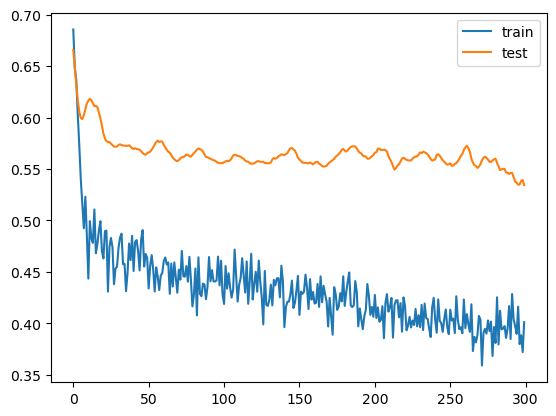

In [39]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

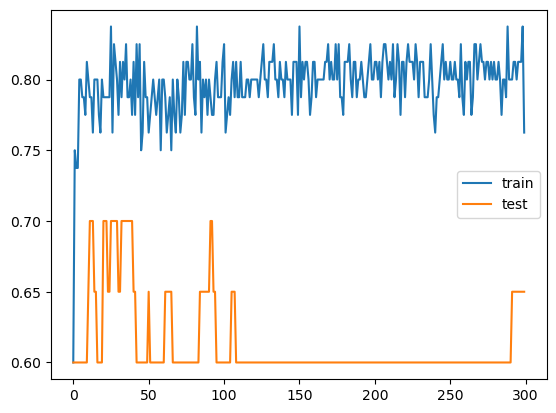

In [40]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [41]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Accuracy: {acc:.3f}')
print(f'Train Loss: {loss:.3f}')

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')
print(f'Test Loss: {loss:.3f}')

Train Accuracy: 0.800
Train Loss: 0.364
Test Accuracy: 0.650
Test Loss: 0.534


In [42]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 95ms/step


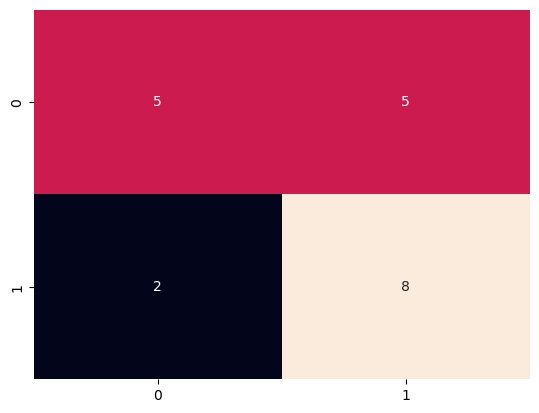

In [43]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cbar=False)
plt.show()

9600/9600 [==============================] - 12s 1ms/step


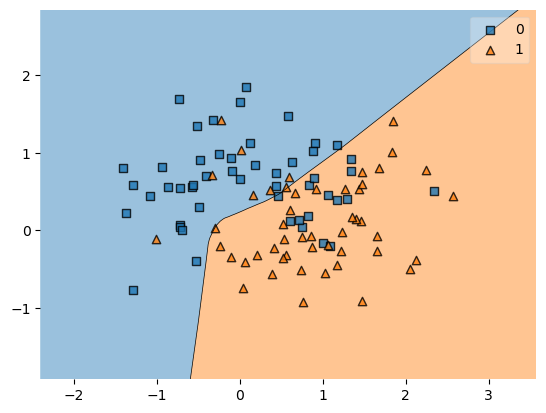

In [44]:
plot_decision_regions(X, y, clf=model, legend=1)
plt.show()